In [7]:
import cv2 # computer vision
import numpy as np
import pandas as pd
import os # files 
import matplotlib.pyplot as plt

In [8]:
extraction_path = r"D:\HARenv\human detection and people count\extraction_frames"

In [6]:
# Path to the video file
video_path = rextraction_path = r"D:\HARenv\human detection and people count\data.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the directory where frames will be saved
extraction_path = r"D:\HARenv\human detection and people count\extraction_frames"
# Initialize frame counter
frame_counter = 1

# Loop through the video frames
while True:
    ret, frame = cap.read()

    if not ret:
        break
    
    # Save the frame with a filename like "frame1.jpg" in the specified directory
    frame_filename = os.path.join(extraction_path, f'frame{frame_counter}.jpg')
    cv2.imwrite(frame_filename, frame)
    
    frame_counter += 1

# Release the video capture object
cap.release()

print(f"The frames per second (fps) of the video is: {fps}")

The frames per second (fps) of the video is: 24


In [7]:
print(frame_counter)

241


# (i) Object Detection and Bounding Boxes

# (ii) Counting People

# (iii) Screen Time Calculation


In [9]:
# yolov3 have single output layer for probability distribution and box predictions.
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
# weights - neural network parameters like bias,propagation etcc.
# cfg - configuration , architecture

In [10]:
extraction_path=r"D:\HARenv\human detection and people count\extraction_frames"

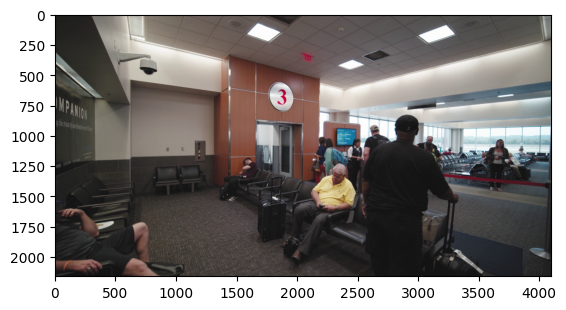

In [12]:
img = plt.imread(r"D:\HARenv\human detection and people count\extraction_frames\frame20.jpg")   # reading image using its name
plt.imshow(img)

# Human detection

In [11]:
current_person_id = 0
printed_person_ids = set() # to keep track on already printed persons, set is used because of uniqueness
class_ids=[] # 0 for people in the model
data=[] # details of detected persons and their frames

for i in range(1, frame_counter):

    frame_path = extraction_path + "\\frame%d.jpg" % i
    image = cv2.imread(frame_path)
    height, width = image.shape[:2] # first 2 values in the image which is height and width

    # Preprocess the frames for YOLOv3
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB=True, crop=False)
   # A pixel with a value of 0 is completely dark (black), while a pixel with a value of 255 is completely bright (white)
   # 0.00392: This is a scaling factor. It's used to scale pixel values ( adjusting pixel values in a image). In YOLOv3, 
   # images are usually preprocessed by dividing pixel values by 255.0, but this factor helps fine-tune the scaling and normalization
   # open cv loads BGR so swapRB=True
    
    net.setInput(blob) # sets input for the network

    # Get output
    outs = net.forward(net.getUnconnectedOutLayersNames()) # performs forward pass and gets the output.
    # outs =    [x1, y1, width1, height1, confidence1, class_id1]... for all layers 
    # outs - output layer
    
    # Thresholds
    conf_threshold = 0.5
    nms_threshold = 0

    confidences = []
    boxes = []

    # Detection process
    for out in outs: # iterate each output layer
        for detection in out:  # iterate each detected object in that output layer
            scores = detection[5:] # scores contains the confidence scores for different classes
            class_id = np.argmax(scores) # class_id with the highest confidence
            confidence = scores[class_id] # confidence score for class_id which may person,or object, person's class=0

            if confidence > conf_threshold and class_id == 0:  # checks confidence > threshold class_id = 0 means people
                center_x = int(detection[0] * width) # horizontal center Calculates the x-coordinate of the center of the bounding box in pixels.
                center_y = int(detection[1] * height) #  vertical center Calculates the y-coordinate of the center of the bounding box in pixels.
                w = int(detection[2] * width) # width
                h = int(detection[3] * height) # height
                x = int(center_x - w / 2) # x-coordinate top left corner of bounding box
                y = int(center_y - h / 2) # y-coordinate top left corner of bounding box

                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

                # class_ids (the class ID, which is 0 for people), confidences (the confidence score),
                # and boxes (the coordinates and dimensions of the bounding box). 
                # This data can be used for further processing or visualization of the detected people

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # indices holds the indices of the bounding boxes that represent distinct and confident detections
    current_person_id = 0

    # Draw bounding boxes without tracking
    for index in indices:
        x, y, w, h = boxes[index]
        color = (0, 255, 0)  # Green color
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 3)
        
        # Increment the person ID
        current_person_id += 1 # tracking id

        # Append the data as a dictionary
        data.append({
            "Frame Name": f"frame{i}.jpg",
            "Person ID": current_person_id,
        })

        printed_person_ids.add(current_person_id)

    # Display the frame with bounding boxes
    resized_image = cv2.resize(image, (800, 600))
    cv2.imshow("Bounding box", resized_image)

    key = cv2.waitKey(1)

    if key == ord('q'):
        break

cv2.destroyAllWindows()

In [13]:
print("printed person id ",printed_person_ids)
print("class_id ",class_ids)
print("Data ",data)

printed person id  {1, 2, 3, 4, 5, 6, 7, 8}
class_id  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Counting people

In [35]:
print("total count of people is ",len(printed_person_ids)) # count total number of ids assigned

total count of people is  8


# Calculate screen time of each person

In [32]:
# WORST QUALITY
# from pytube import YouTube as yt
# video_link = "https://www.youtube.com/watch?v=9h2bKsJ7j_c"
# vid = yt(video_link)
# stream = vid.streams.first()
# stream.download()

In [36]:
df=pd.DataFrame(data)
df

,Frame Name,Person ID
0,frame1.jpg,1
1,frame1.jpg,2
2,frame1.jpg,3
3,frame1.jpg,4
4,frame1.jpg,5
...,...,...
1288,frame240.jpg,2
1289,frame240.jpg,3
1290,frame240.jpg,4
1291,frame240.jpg,5


In [37]:
csv_file = 'data1.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file, index=False)

data = pd.read_csv('data1.csv')

In [38]:
first_person = len(df[df['Person ID'] == 1])

# Count rows where Class is 'Both in the frame'
p2 = len(df[df['Person ID'] == 2])
p3 = len(df[df['Person ID'] == 3])
p4 = len(df[df['Person ID'] == 4])
p5 = len(df[df['Person ID'] == 5])
p6 = len(df[df['Person ID'] == 6])
p7 = len(df[df['Person ID'] == 7])
p8 = len(df[df['Person ID'] == 8])


print(f"Count of 'person 1': {first_person} frames ")
print(f"Count of 'person 2': {p2} frames" )
print(f"Count of 'person 3': {p3} frames" )
print(f"Count of 'person 4': {p4} frames" )
print(f"Count of 'person 5': {p5} frames" )
print(f"Count of 'person 6': {p6} frames" )
print(f"Count of 'person 7': {p7} frames" )
print(f"Count of 'person 8': {p8} frames" )

Count of 'person 1': 240 frames 
Count of 'person 2': 240 frames
Count of 'person 3': 240 frames
Count of 'person 4': 240 frames
Count of 'person 5': 209 frames
Count of 'person 6': 104 frames
Count of 'person 7': 19 frames
Count of 'person 8': 1 frames


In [40]:
first_person/fps

10.0

Activity recognition

In [17]:
import cv2
import torch
import torchvision.transforms as transforms
from torchvision.models.video import r3d_18

In [28]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.models.video import r3d_18

# Load YOLOv3 for person detection
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# Load COCO class names for YOLOv3
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')

# Load the pre-trained activity recognition model
activity_model = r3d_18(pretrained=True)
activity_model.eval()

# Define a function to preprocess frames for the activity recognition model
def preprocess_frame(frame):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((112, 112)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989]),
    ])
    return transform(frame)

# Open the video
video_capture = cv2.VideoCapture('data.mp4')

current_person_id = 0
printed_person_ids = set()  # To keep track of already printed persons
class_ids = []  # 0 for people in the model
data = []  # Details of detected persons and their frames

# ... (previous code)

while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    height, width = frame.shape[:2]

    # Preprocess the frames for YOLOv3
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output
    outs = net.forward(net.getUnconnectedOutLayersNames())

    # Thresholds
    conf_threshold = 0.5
    nms_threshold = 0

    confidences = []
    boxes = []

    # Detection process
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > conf_threshold and class_id == 0:  # Class ID 0 represents people
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    current_person_id = 0

    # Iterate through each detected person
    for index in indices:
        x, y, w, h = boxes[index]
        color = (0, 255, 0)  # Green color
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 3)

        # Crop the frame to get the region containing the person
        person_frame = frame[y:y + h, x:x + w]

        # Ensure the person_frame has 3 channels (RGB)
        if person_frame.shape[-1] != 3:
            person_frame_rgb = cv2.cvtColor(person_frame, cv2.COLOR_BGR2RGB)
        else:
            person_frame_rgb = person_frame

        # Preprocess the person_frame for activity recognition
        preprocessed_frame = preprocess_frame(person_frame_rgb)

        # Perform activity recognition for this person
        with torch.no_grad():
            prediction = activity_model(preprocessed_frame.unsqueeze(0))
        activity_label = prediction.argmax().item()

        # Append the activity label to the data
        data.append({
            "Frame Name": f"frame{i}.jpg",
            "Person ID": current_person_id,
            "Activity": activity_label,
        })

        printed_person_ids.add(current_person_id)

        # Display the recognized activity label along with the bounding box
        cv2.putText(frame, f'Person ID: {current_person_id}, Activity: {activity_label}', (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        current_person_id += 1

    # Display the frame with bounding boxes and recognized activities
    resized_image = cv2.resize(frame, (800, 600))
    cv2.imshow("Bounding box with Activity Recognition", resized_image)

    key = cv2.waitKey(1)

    if key == ord('q'):
        break

# Release the video capture and close windows
video_capture.release()
cv2.destroyAllWindows()


RuntimeError: Given groups=1, weight of size [64, 3, 3, 7, 7], expected input[1, 1, 3, 112, 112] to have 3 channels, but got 1 channels instead